In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
%matplotlib inline

# Covid-19 Data manipulation
## Fetching cases from Brasil.io

In [3]:
cases = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
cases

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-30,GO,Águas Lindas de Goiás,city,1,0.0,True,212440.0,5200258.0,0.47072,NaN
1,2020-03-30,GO,Anápolis,city,4,0.0,True,386923.0,5201108.0,1.03380,NaN
2,2020-03-30,GO,Aparecida de Goiânia,city,2,0.0,True,578179.0,5201405.0,0.34591,NaN
3,2020-03-30,GO,Catalão,city,1,0.0,True,108823.0,5205109.0,0.91892,NaN
4,2020-03-30,GO,Goianésia,city,1,0.0,True,70084.0,5208608.0,1.42686,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2609,2020-02-28,SP,NaN,state,2,NaN,False,45919049.0,35.0,0.00436,NaN
2610,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
2611,2020-02-27,SP,NaN,state,1,NaN,False,45919049.0,35.0,0.00218,NaN
2612,2020-02-26,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN


## Fetching from the Johns Hopkins dashboard
Jonhs Hopkins dashboard data is stored on [Github](https://github.com/CSSEGISandData/COVID-19). There are daily reports and timeseries.

In [7]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [8]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,5
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


## Loading the map of Brasil at municipality level 

In [5]:
mapa = gpd.read_file('../mapas/muni_br.gpkg')

## Adding latest confirmed case count to the map

In [6]:
mapa['casos']=0
for i, row in mapa.iterrows():
    if row.code_muni in list(cases.city_ibge_code):
        mapa.loc[mapa.code_muni==row.code_muni, 'casos'] += cases[(cases.city_ibge_code==row.code_muni)&(cases.is_last)].confirmed.iloc[0]

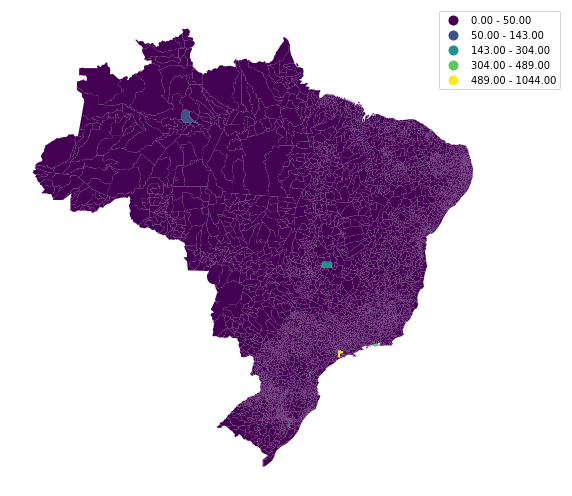

In [9]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
mapa.plot(column='casos', ax=ax, legend=True, scheme='NaturalBreaks');
ax.set_axis_off()